# Spatial pattern of biases at climatological mean level

- This notebook aims to quantify biases of sWBGT and ESI by comparing with Liljegren et al. (2008)'s explicit formulation of WBGT.


- In Figure 1, we explored the bias structure within an idealized setting. Now, we will explore the bias distribution within the more realistic setting of ERA5 reanalysis data. 


- In this notebook, we will reproduce Figure 2 in "Explicit Calculations of Wet Bulb Globe Temperature compared with approximations and why it matters for labor productivity" by Qinqin Kong and Matthew Huber. 

In [1]:
import xarray as xr
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
import cmaps
import regionmask
import cartopy.crs as ccrs

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"
import warnings
warnings.filterwarnings("ignore")

### Read in data:

In [3]:
# read in data of climatological monthly average of WBGT, sWBGT, ESI, and sWBGT/ESI biases
clima=xr.open_dataset('/scratch/brown/kong97/paper_data/earthfuture_kong_huber_2021/climatological_mean.nc')

# Reproduce Figure 2

In [5]:
# create land mask
mask = regionmask.defined_regions.natural_earth.land_110.mask(clima,lon_name="longitude",lat_name="latitude")

# create meshgrid of latitude and longitude
LON,LAT=np.meshgrid(clima.longitude,clima.latitude)

# function to plot each individual subplot
def subplot1(data,axis,norm,cmap,landmask):
    # plot the value
    g=axis.pcolormesh(LON, LAT,data.where(landmask==0),
                      transform=ccrs.PlateCarree(),
                      cmap=cmap,norm=norm,rasterized=True) 
    axis.coastlines(linewidth=0.5) # add coastlines
    axis.set_title('')
    axis.set_extent([-169.999,189.999,-60,70]) # set extent of the map to exclude high latitudes
    return g
def subplot2(data,pvalue,axis,norm,cmap,landmask):
    # plot the value
    g=axis.pcolormesh(LON, LAT,data.where(landmask==0),
                      transform=ccrs.PlateCarree(),
                      cmap=cmap,norm=norm,rasterized=True) 
    # overlay statistical significance with areas not significant being hatched
    pvalue.where(landmask==0).plot.contourf(ax=axis,transform=ccrs.PlateCarree(),
                         colors='none',levels=[0,0.05,1],hatches=[None,'///'],add_colorbar=False,alpha=0,rasterized=True)
    axis.coastlines(linewidth=0.5) # add coastlines
    axis.set_title('')
    axis.set_extent([-169.999,189.999,-60,70]) # set extent of the map to exclude high latitudes
    return g

# function to make the whole plot
def plot(clima):    
    # set the colorbar scale
    levels1 = np.arange(-4,43,2)
    norm1=mpl.colors.BoundaryNorm(levels1,ncolors=len(levels1)+1,extend='both')
    # choose colormap
    cmap1=cmaps.StepSeq25.reversed()
    
    # set the colorbar scale
    levels2 = [-7, -6, -5, -4, -3, -2, -1,-0.5,  0.5,  1,  2,  3,  4,  5,  6,  7]
    norm2=mpl.colors.BoundaryNorm(levels2,ncolors=len(levels2)+1,extend='both')
    # choose colormaps
    color=np.array([[8,29,88],
              [2,56,88],
              [4,90,141],
              [5,112,176],
              [54,144,192],
              [116,169,207],
              [166,189,219],
              [236,231,242],
              [255,255,255],
              [255,247,188],
              [254,196,79],
              [254,153,41],
              [236,112,20],
              [204,76,2],
              [153,52,4],
              [102,37,6],
              [223,101,176]])
    cmap2=mpl.colors.ListedColormap(color/255.)
    
    # use gridspec to customize the relative size and position of subplots
    gs_top = plt.GridSpec(3, 3, top=0.95,hspace=-0.4,wspace=0.05)
    gs_base = plt.GridSpec(3, 3,hspace=-0.4,wspace=0.05)
    # create a figure
    fig = plt.figure(figsize=[18, 12])
    # add axis
    ax1 = fig.add_subplot(gs_top[0,0],projection=ccrs.Robinson(central_longitude=10))
    ax2 = fig.add_subplot(gs_top[0,1],projection=ccrs.Robinson(central_longitude=10))
    ax3 = fig.add_subplot(gs_top[0,2],projection=ccrs.Robinson(central_longitude=10))
    ax4 = fig.add_subplot(gs_base[1,0], projection=ccrs.Robinson(central_longitude=10))
    ax5 = fig.add_subplot(gs_base[1,1], projection=ccrs.Robinson(central_longitude=10))
    ax6 = fig.add_subplot(gs_base[1,2], projection=ccrs.Robinson(central_longitude=10))
    ax7 = fig.add_subplot(gs_base[2,0], projection=ccrs.Robinson(central_longitude=10))
    ax8 = fig.add_subplot(gs_base[2,1], projection=ccrs.Robinson(central_longitude=10))
    ax9 = fig.add_subplot(gs_base[2,2], projection=ccrs.Robinson(central_longitude=10))
    
    # add annotates
    anno_opts = dict(xy=(0.5, 1.1), xycoords='axes fraction',va='center', ha='center')
    ax1.annotate('Mean', **anno_opts,fontsize=16)
    ax2.annotate('Max', **anno_opts,fontsize=16)
    ax3.annotate('Min', **anno_opts,fontsize=16)
    
    anno_opts = dict(xy=(-0.1, 0.5), xycoords='axes fraction',va='center', ha='center')
    ax1.annotate('WBGT', **anno_opts,fontsize=16,rotation=90)
    ax4.annotate('sWBGT-WBGT', **anno_opts,fontsize=16,rotation=90)
    ax7.annotate('ESI-WBGT', **anno_opts,fontsize=16,rotation=90)
    
    anno_opts = dict(xy=(0, 1.05), xycoords='axes fraction',va='center', ha='center')
    num=['a','b','c','d','e','f','g','h','i']
    i=0
    for ax in [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]:
        ax.annotate(num[i], **anno_opts,fontsize=16)
        i+=1
    
    # call subplot function to plot climatological mean values of daily mean, maximum and minimum WBGT
    g=subplot1(clima.wbgt_ma-273.15,ax1,norm1,cmap1,mask)
    subplot1(clima.wbgt_dmax-273.15,ax2,norm1,cmap1,mask)
    subplot1(clima.wbgt_dmin-273.15,ax3,norm1,cmap1,mask)
    
    # plot colorbar for ax1-ax3
    cb1=fig.colorbar(g,ax=(ax1,ax2,ax3),orientation='horizontal',pad=0.05,shrink=0.5,fraction=.08,
                     ticks=[-4,4,14,24,34,42],aspect=30)
    cb1.set_label(label="WBGT ($^\circ$C)", size=14)
    cb1.ax.tick_params(labelsize=12)
    
    # call subplot function to plot biases at climatological mean level
    # swbgt biases
    h=subplot2(clima.swbgt_ma-clima.wbgt_ma,clima.pvalue_swbgt_ma,ax4,norm2,cmap2,mask)
    subplot2(clima.swbgt_dmax-clima.wbgt_dmax,clima.pvalue_swbgt_dmax,ax5,norm2,cmap2,mask)
    subplot2(clima.swbgt_dmin-clima.wbgt_dmin,clima.pvalue_swbgt_dmin,ax6,norm2,cmap2,mask)
    # esi biases
    subplot2(clima.esi_ma-clima.wbgt_ma+273.15,clima.pvalue_esi_ma,ax7,norm2,cmap2,mask)
    subplot2(clima.esi_dmax-clima.wbgt_dmax+273.15,clima.pvalue_esi_dmax,ax8,norm2,cmap2,mask)
    subplot2(clima.esi_dmin-clima.wbgt_dmin+273.15,clima.pvalue_esi_dmin,ax9,norm2,cmap2,mask)
    
    # plot colorbar for ax4-ax9
    cb2=fig.colorbar(h,ax=((ax4,ax5,ax6),(ax7,ax8,ax9)),orientation='horizontal', pad=0.05,shrink=0.5,fraction=.09,
                     ticks=np.arange(-7,8),aspect=30,spacing='proportional') 
    cb2.set_label(label="sWBGT/ESI - WBGT ($^\circ$C)", size=14)
    cb2.ax.tick_params(labelsize=12)    

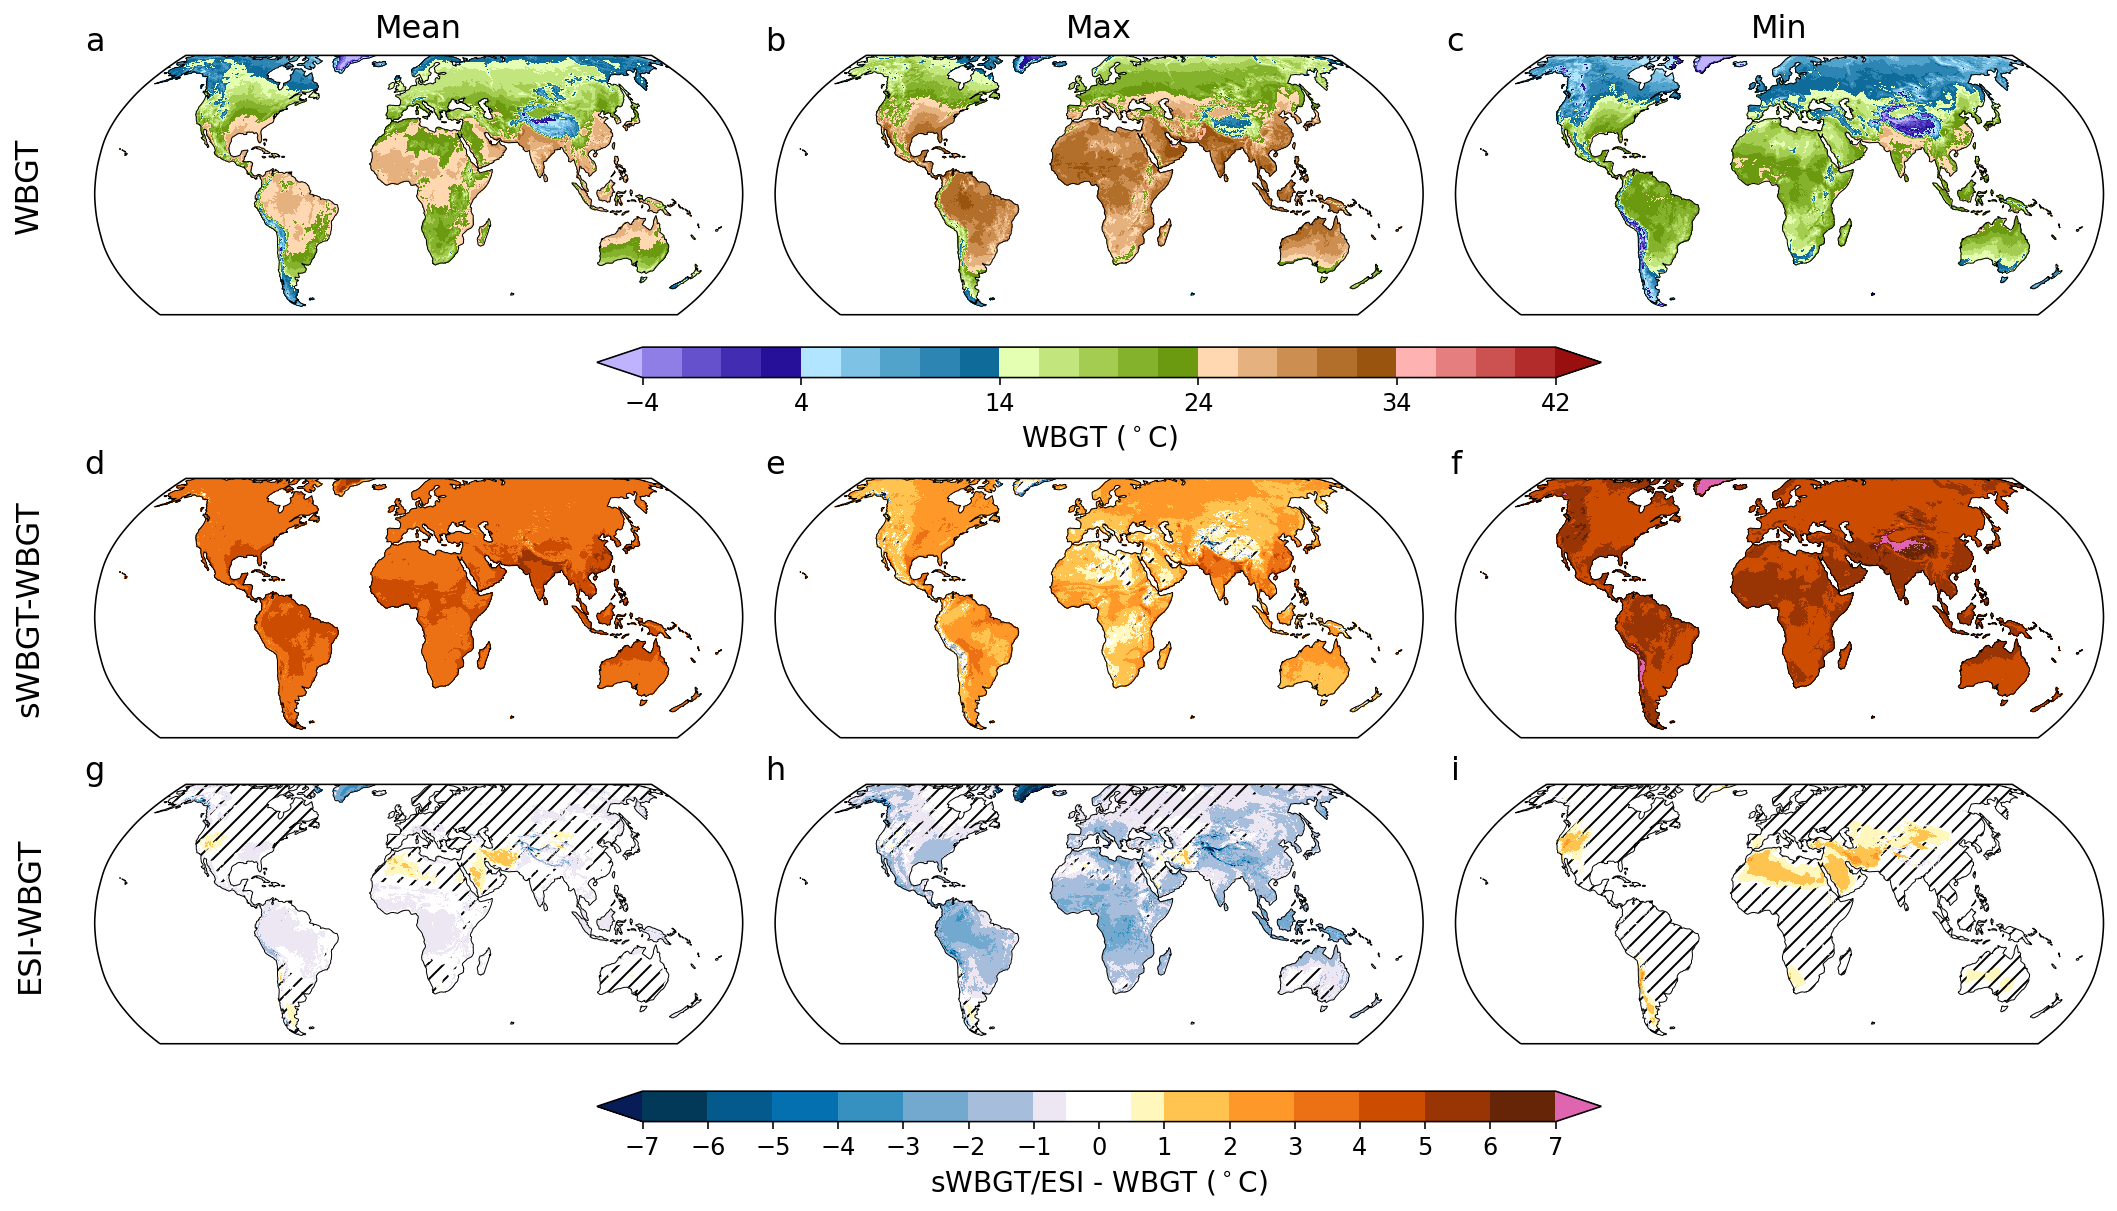

In [6]:
plot(clima)
plt.savefig("/scratch/brown/kong97/paper_data/earthfuture_kong_huber_2021/figures_Robinson/Figure2.pdf", bbox_inches='tight',dpi=400)

# Figure caption
Climatological monthly average (CMA) of (a) daily mean, (b) maximum and (c) minimum WBGT for the period 1990-2019. Biases of (d-f) sWBGT and (g-i) ESI with respect to CMA of (d, g) daily mean, (e, h) maximum and (f, i) minimum values. Areas with biases not statistically significant at 5% level are hatched in d-i. Only the hottest calendar month (determined by CMA WBGT) is included.